<a href="https://colab.research.google.com/github/seeedata/BADA/blob/main/0601%20NLP%20Practice/Session%20HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제

크롤링 하고 싶은 웹사이트 선정 및 NLP 분석 수행

# Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pandas as pd

In [7]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Crawling

IMDB 사이트에서 영화 Your Name의 관객 리뷰 데이터를 크롤링

In [ ]:
driver = webdriver.Chrome(service = Service('chromedriver.exe'))
url = "https://www.imdb.com/title/tt5311514/reviews?ref_=tt_urv"
driver.get(url)

In [ ]:
title = []
reviews = []

i = 0

while i < 100:  #100개 리뷰 데이터 크롤링

    loading_num = i // 25  #load more 버튼 누를 때마다 25개 리뷰 보임
    for k in range(0, loading_num):
        try:
            driver.find_element(By.CLASS_NAME, 'ipl-load-more__button').click()
            sleep(2)
        except:
            break

    names = driver.find_elements(By.CLASS_NAME, 'title')
    names[i].click()
    sleep(2)

    t = driver.find_element(By.CLASS_NAME, 'title').text
    title.append(t)

    r2 = driver.find_element(By.CLASS_NAME, 'content').text
    reviews.append(r2)

    driver.back()  #이전 페이지로 돌아간다.
    driver.implicitly_wait(2)  #웹 드라이버가 최대 2초 동안 요소가 나타날 때까지 대기하도록 지정

    if i%10 == 0:
        print(i)

    i = i + 1

0
10
20
30
40
50
60
70
80
90


In [ ]:
title

['could be the greatest love story of all time',
 'Once seen, never forgotten- truly magnificent',
 'Your Name',
 'Forget Disney! We have movies like Your Name.',
 'Cosmically enchanting, touching and visually beautiful.',
 "You wonder HOW the Academy didn't nominate this lovely picture...",
 'As Deep as the Mariana Trench...',
 'Yes, yes and yes!',
 'I am speechless.',
 'Unforgettable',
 'What seems to be a silly premise evolved into something even more trifling. But with its unbearable charm, it worked astonishingly well.',
 'One of the greatest human stories ever...',
 'One of the Greatest movies i watched in my entire life.',
 'Wistful, poignant and ultimately uplifting; beautifully animated and wonderfully inventive.',
 'Phenomenal',
 'Hold onto that feeling',
 'why YOUR NAME is the best animated movie of the last five years',
 "One of the most beautiful films I've ever seen",
 'Perfectly balances all the elements, providing plenty in all of them (SUGGESTIVE SPOILERS)',
 'A Beauti

In [ ]:
reviews

['In truth, the most competitive area of fiction is not invasions from outer space or talking dogs or impossible missions but rather the most basic narrative of all, the love story.\n\nAnd this is also the most overcrowded field, and the most difficult to do right.\n\nThis film, this story, is extraordinary. It reminds me of MY SASSY GIRL, a love story from Asia that captured the imagination of the world and has almost become a franchise, it\'s been copied so many times.\n\nIt also brings to mind Richard Matheson\'s classic BID TIME RETURN, another love story for the ages that uses time juxtaposition. (Done as the movie SOMEWHERE IN TIME, 1980).\n\nI already gave this the highest rating on the IMDb.\n\nThe animation is stunning and complimentary to this one-of-a-kind tale.\n\nAll things considered, I would like to avoid the ongoing arguments about which Japanese animation studio is better, or worse, than the other.\n\nI prefer to simply be grateful that Japanese anime exists at all, be

In [ ]:
yourname = pd.DataFrame({'Title': title, 'Review': reviews})
yourname

Title  \
0        could be the greatest love story of all time   
1       Once seen, never forgotten- truly magnificent   
2                                           Your Name   
3       Forget Disney! We have movies like Your Name.   
4   Cosmically enchanting, touching and visually b...   
..                                                ...   
95                  Amazing animation, touching story   
96                                          Overrated   
97  I don't like it very much, the plot is very co...   
98                       It simply made me feel again   
99                                 Sad Happy confused   

                                               Review  
0   In truth, the most competitive area of fiction...  
1   'Your Name' is not just one of the best animes...  
2                                                      
3   Your Name is just a good movie. This movie fel...  
4   It's been a while since I've seen something ou...  
..                                                ...  
95  Pure Japanese magic. The effort and skill that...  
96  "Kimi no Na Wa" (2016) = 7.0 This film did not...  
97  There are many highlights. Unfortunately, afte...  
98  What it says above. It's so fresh, so new and ...  
99  Just amazing . I can never forget this movie. ...  

[100 rows x 2 columns]

In [ ]:
yourname.to_excel("C:/Users/이세은/Desktop/BADA/nlp/yourname_reviews.xlsx", index=False)

# Bag of Words

In [3]:
df = pd.read_excel("/content/drive/MyDrive/BADA/0601 NLP 실습/yourname_reviews.xlsx")
pd.set_option('display.max_columns', None)   #데이터프레임을 출력할 때 열을 모두 표시하도록 설정
df_dropna = df.dropna()
df_dropna.head()

Title  \
0       could be the greatest love story of all time   
1      Once seen, never forgotten- truly magnificent   
3      Forget Disney! We have movies like Your Name.   
4  Cosmically enchanting, touching and visually b...   
6                   As Deep as the Mariana Trench...   

                                              Review  
0  In truth, the most competitive area of fiction...  
1  'Your Name' is not just one of the best animes...  
3  Your Name is just a good movie. This movie fel...  
4  It's been a while since I've seen something ou...  
6  ... and as intricately woven from an abstract ...

In [4]:
doc_origin = df_dropna['Review'].to_list()
doc_origin

['In truth, the most competitive area of fiction is not invasions from outer space or talking dogs or impossible missions but rather the most basic narrative of all, the love story.\n\nAnd this is also the most overcrowded field, and the most difficult to do right.\n\nThis film, this story, is extraordinary. It reminds me of MY SASSY GIRL, a love story from Asia that captured the imagination of the world and has almost become a franchise, it\'s been copied so many times.\n\nIt also brings to mind Richard Matheson\'s classic BID TIME RETURN, another love story for the ages that uses time juxtaposition. (Done as the movie SOMEWHERE IN TIME, 1980).\n\nI already gave this the highest rating on the IMDb.\n\nThe animation is stunning and complimentary to this one-of-a-kind tale.\n\nAll things considered, I would like to avoid the ongoing arguments about which Japanese animation studio is better, or worse, than the other.\n\nI prefer to simply be grateful that Japanese anime exists at all, be

In [5]:
#불필요한 정보 제거
for i in range(len(doc_origin)):
    if type(doc_origin[i]) == str:
        last_index = doc_origin[i].rindex('\n')  #문자열을 뒤에서부터 검색해 \n의 마지막 등장 위치를 반환
                                                 #-> \nPermalink 제거
        second_last_index = doc_origin[i].rindex('\n', 0, last_index)  #0부터 last_index까지의 범위에서 마지막으로 등장하는 '\n'의 위치를 반환
                                                                       #-> \n110 out of 126 found this helpful. Was this review helpful? Sign in to vote. 제거
        doc_origin[i] = doc_origin[i][:second_last_index]

In [6]:
doc_origin

['In truth, the most competitive area of fiction is not invasions from outer space or talking dogs or impossible missions but rather the most basic narrative of all, the love story.\n\nAnd this is also the most overcrowded field, and the most difficult to do right.\n\nThis film, this story, is extraordinary. It reminds me of MY SASSY GIRL, a love story from Asia that captured the imagination of the world and has almost become a franchise, it\'s been copied so many times.\n\nIt also brings to mind Richard Matheson\'s classic BID TIME RETURN, another love story for the ages that uses time juxtaposition. (Done as the movie SOMEWHERE IN TIME, 1980).\n\nI already gave this the highest rating on the IMDb.\n\nThe animation is stunning and complimentary to this one-of-a-kind tale.\n\nAll things considered, I would like to avoid the ongoing arguments about which Japanese animation studio is better, or worse, than the other.\n\nI prefer to simply be grateful that Japanese anime exists at all, be

In [8]:
nltk_stopwords = set(stopwords.words("english"))
my_stopwords = ['your', 'name', 'yourname', 'movie']
new_stopwords = nltk_stopwords.union(my_stopwords)

In [9]:
ps = PorterStemmer()

In [10]:
#doc_origin에서 문자열 요소만 추출
def filter_strings(doc_origin):
    doc = [item for item in doc_origin if isinstance(item, str)]
    return doc

In [11]:
doc = filter_strings(doc_origin)
print(doc)

['In truth, the most competitive area of fiction is not invasions from outer space or talking dogs or impossible missions but rather the most basic narrative of all, the love story.\n\nAnd this is also the most overcrowded field, and the most difficult to do right.\n\nThis film, this story, is extraordinary. It reminds me of MY SASSY GIRL, a love story from Asia that captured the imagination of the world and has almost become a franchise, it\'s been copied so many times.\n\nIt also brings to mind Richard Matheson\'s classic BID TIME RETURN, another love story for the ages that uses time juxtaposition. (Done as the movie SOMEWHERE IN TIME, 1980).\n\nI already gave this the highest rating on the IMDb.\n\nThe animation is stunning and complimentary to this one-of-a-kind tale.\n\nAll things considered, I would like to avoid the ongoing arguments about which Japanese animation studio is better, or worse, than the other.\n\nI prefer to simply be grateful that Japanese anime exists at all, be

In [12]:
doc2 = []

for d in doc:
    d1 = word_tokenize(d)  #문장을 단어 단위로 분리
    d2 = [w.lower() for w in d1 if w.isalpha()]  #소문자 변환
    d3 = [w for w in d2 if not w in new_stopwords]  #불용어 제거
    d4 = [ps.stem(w) for w in d3]  #stemming
    doc2.append(d4)

In [13]:
doc2

[['truth',
  'competit',
  'area',
  'fiction',
  'invas',
  'outer',
  'space',
  'talk',
  'dog',
  'imposs',
  'mission',
  'rather',
  'basic',
  'narr',
  'love',
  'stori',
  'also',
  'overcrowd',
  'field',
  'difficult',
  'right',
  'film',
  'stori',
  'extraordinari',
  'remind',
  'sassi',
  'girl',
  'love',
  'stori',
  'asia',
  'captur',
  'imagin',
  'world',
  'almost',
  'becom',
  'franchis',
  'copi',
  'mani',
  'time',
  'also',
  'bring',
  'mind',
  'richard',
  'matheson',
  'classic',
  'bid',
  'time',
  'return',
  'anoth',
  'love',
  'stori',
  'age',
  'use',
  'time',
  'juxtaposit',
  'done',
  'somewher',
  'time',
  'alreadi',
  'gave',
  'highest',
  'rate',
  'imdb',
  'anim',
  'stun',
  'complimentari',
  'tale',
  'thing',
  'consid',
  'would',
  'like',
  'avoid',
  'ongo',
  'argument',
  'japanes',
  'anim',
  'studio',
  'better',
  'wors',
  'prefer',
  'simpli',
  'grate',
  'japanes',
  'anim',
  'exist',
  'imagin',
  'countri',
  'pro

In [14]:
#이중리스트 제거
doc3 = []

for d in doc2:
    doc3.extend(d)

In [15]:
print(doc3)

['truth', 'competit', 'area', 'fiction', 'invas', 'outer', 'space', 'talk', 'dog', 'imposs', 'mission', 'rather', 'basic', 'narr', 'love', 'stori', 'also', 'overcrowd', 'field', 'difficult', 'right', 'film', 'stori', 'extraordinari', 'remind', 'sassi', 'girl', 'love', 'stori', 'asia', 'captur', 'imagin', 'world', 'almost', 'becom', 'franchis', 'copi', 'mani', 'time', 'also', 'bring', 'mind', 'richard', 'matheson', 'classic', 'bid', 'time', 'return', 'anoth', 'love', 'stori', 'age', 'use', 'time', 'juxtaposit', 'done', 'somewher', 'time', 'alreadi', 'gave', 'highest', 'rate', 'imdb', 'anim', 'stun', 'complimentari', 'tale', 'thing', 'consid', 'would', 'like', 'avoid', 'ongo', 'argument', 'japanes', 'anim', 'studio', 'better', 'wors', 'prefer', 'simpli', 'grate', 'japanes', 'anim', 'exist', 'imagin', 'countri', 'produc', 'someth', 'move', 'power', 'graphic', 'form', 'design', 'imdb', 'top', 'review', 'pleas', 'check', 'list', 'movi', 'occasion', 'anim', 'tv', 'miniseri', 'see', 'present'

In [16]:
#중복을 제거한 고유한 단어들의 집합
u_words = set(doc3)
u_words

{'despit',
 'vote',
 'alreadi',
 'say',
 'scare',
 'katawar',
 'complex',
 'heart',
 'versu',
 'neatli',
 'travel',
 'happi',
 'persist',
 'someon',
 'foreign',
 'firstli',
 'nitpick',
 'game',
 'whatev',
 'advanc',
 'trifl',
 'absorb',
 'buzz',
 'wow',
 'tougher',
 'verbal',
 'either',
 'think',
 'electr',
 'dialogu',
 'depress',
 'lit',
 'million',
 'constantli',
 'suggest',
 'hyperbol',
 'came',
 'melancholia',
 'construct',
 'till',
 'classic',
 'month',
 'consid',
 'spoiler',
 'quiet',
 'intern',
 'honor',
 'borderlin',
 'thrown',
 'wake',
 'animaton',
 'xin',
 'grandma',
 'bonu',
 'sacrific',
 'bigger',
 'humor',
 'addit',
 'across',
 'know',
 'mitsusha',
 'speak',
 'investig',
 'roller',
 'outsid',
 'miyamizu',
 'faintest',
 'screenplay',
 'except',
 'involv',
 'inexplic',
 'hound',
 'roughli',
 'premier',
 'clumsili',
 'princess',
 'boot',
 'rewatch',
 'ha',
 'seem',
 'rude',
 'anyth',
 'deepen',
 'site',
 'versa',
 'someth',
 'dynam',
 'bloom',
 'enter',
 'behaviour',
 'dont',

In [17]:
#각 리뷰(문서)에 포함된 단어의 빈도수 세기
for d in doc2:
    c1 = Counter(d)
    print(c1)

Counter({'stori': 4, 'time': 4, 'anim': 4, 'love': 3, 'also': 2, 'imagin': 2, 'imdb': 2, 'japanes': 2, 'truth': 1, 'competit': 1, 'area': 1, 'fiction': 1, 'invas': 1, 'outer': 1, 'space': 1, 'talk': 1, 'dog': 1, 'imposs': 1, 'mission': 1, 'rather': 1, 'basic': 1, 'narr': 1, 'overcrowd': 1, 'field': 1, 'difficult': 1, 'right': 1, 'film': 1, 'extraordinari': 1, 'remind': 1, 'sassi': 1, 'girl': 1, 'asia': 1, 'captur': 1, 'world': 1, 'almost': 1, 'becom': 1, 'franchis': 1, 'copi': 1, 'mani': 1, 'bring': 1, 'mind': 1, 'richard': 1, 'matheson': 1, 'classic': 1, 'bid': 1, 'return': 1, 'anoth': 1, 'age': 1, 'use': 1, 'juxtaposit': 1, 'done': 1, 'somewher': 1, 'alreadi': 1, 'gave': 1, 'highest': 1, 'rate': 1, 'stun': 1, 'complimentari': 1, 'tale': 1, 'thing': 1, 'consid': 1, 'would': 1, 'like': 1, 'avoid': 1, 'ongo': 1, 'argument': 1, 'studio': 1, 'better': 1, 'wors': 1, 'prefer': 1, 'simpli': 1, 'grate': 1, 'exist': 1, 'countri': 1, 'produc': 1, 'someth': 1, 'move': 1, 'power': 1, 'graphic': 1

In [18]:
vector = []

for d in doc2:
    c1 = Counter(d)  #문서 d에 대한 단어의 빈도수
    c2 = [c1.get(w, 0) for w in u_words]  #u_words의 단어 w가 c1에 있으면 해당 단어의 빈도수 출력
                                          #u_words의 단어 w가 c1에 없으면 0 출력
                                          #결국, c2는 현재 문서에 대한 단어 벡터. 각 단어의 빈도수를 표현
    vector.append(c2)  #vector는 모든 문서에 대한 단어 벡터

In [19]:
vector

[[0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


# My Tokenizer

In [20]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [21]:
from nltk import pos_tag
from nltk.corpus import wordnet

def get_pos(w):
    tag = pos_tag([w])[0][1][0].upper()
    if tag == "V":
        return wordnet.VERB
    elif tag == "N":
        return wordnet.NOUN
    elif tag == "J":
        return wordnet.ADJ
    elif tag == "R":
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [25]:
lem = WordNetLemmatizer()

In [26]:
def my_tokenizer(d):
    d1 = word_tokenize(d)
    d2 = [w.lower() for w in d1 if w.isalpha()]
    d3 = [w for w in d2 if not w in new_stopwords]
    d4 = [lem.lemmatize(w, get_pos(w)) for w in d3]
    d5 = [w for w in d4 if not w in new_stopwords]
    return d5

## (1) Count Vectorization

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
cv = CountVectorizer(tokenizer = my_tokenizer, max_df = 0.9)
cv_doc = cv.fit_transform(doc)
u_words = cv.get_feature_names_out()
pd.DataFrame(cv_doc.toarray(), columns = u_words)

aaaarrrggghh  ability  able  abrams  abruptly  absent  absolutely  absorb  \
0              0        0     0       0         0       0           0       0   
1              0        0     0       0         0       0           0       0   
2              0        0     0       0         0       0           0       0   
3              0        0     0       0         0       0           0       0   
4              0        0     0       0         0       0           0       0   
..           ...      ...   ...     ...       ...     ...         ...     ...   
82             0        0     0       0         0       0           0       0   
83             0        0     0       0         0       0           0       0   
84             0        0     0       0         0       0           0       0   
85             0        0     0       0         0       0           0       0   
86             0        0     0       0         0       0           0       0   

    abstract  accentuate  accept  acclaim  accompany  accomplish  \
0          0           0       0        0          0           0   
1          0           0       0        0          0           0   
2          0           0       0        0          0           0   
3          0           0       0        0          0           0   
4          1           0       0        0          0           0   
..       ...         ...     ...      ...        ...         ...   
82         0           0       0        0          0           0   
83         0           0       0        0          0           0   
84         0           0       0        0          1           0   
85         0           0       0        0          0           0   
86         0           0       0        0          0           0   

    accomplishment  achieve  achievement  achingly  across  act  action  \
0                0        0            0         0       0    0       0   
1                0        0            0         0       0    1       0   
2                0        0            0         0       0    0       0   
3                0        0            0         0       0    1       1   
4                0        0            0         0       0    0       0   
..             ...      ...          ...       ...     ...  ...     ...   
82               0        0            0         0       0    0       0   
83               0        0            0         0       0    0       0   
84               0        0            0         0       0    0       0   
85               0        0            0         0       0    0       0   
86               0        0            0         0       0    0       0   

    actor  actual  actually  add  additionally  adolescent  adorable  adore  \
0       0       0         0    0             0           0         0      0   
1       0       0         0    0             0           0         0      0   
2       0       0         0    0             0           0         0      0   
3       0       1         0    1             0           0         0      0   
4       0       0         0    0             0           0         0      0   
..    ...     ...       ...  ...           ...         ...       ...    ...   
82      0       0         1    0             0           0         0      0   
83      0       0         0    0             0           0         0      0   
84      0       0         0    0             0           0         0      0   
85      0       0         0    0             0           0         0      0   
86      0       0         0    0             0           0         0      0   

    adult  advancement  advent  adventure  aesthetic  affect  affection  \
0       0            0       0          0          0       0          0   
1       0            0       0          0          0       0          0   
2       0            0       0          0          0       0          0   
3       0            1       0          1          0       0    

## (2) TF-IDF

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer = my_tokenizer, max_df = 0.95)
tfidf_doc = tfidf.fit_transform(doc)
tfidf_doc.toarray()

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.0518455,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [29]:
tfidf_terms = tfidf.get_feature_names_out()
doc_vector = pd.DataFrame(tfidf_doc.toarray(), columns = tfidf_terms)
doc_vector

aaaarrrggghh  ability  able  abrams  abruptly  absent  absolutely  absorb  \
0            0.0      0.0   0.0     0.0       0.0     0.0         0.0     0.0   
1            0.0      0.0   0.0     0.0       0.0     0.0         0.0     0.0   
2            0.0      0.0   0.0     0.0       0.0     0.0         0.0     0.0   
3            0.0      0.0   0.0     0.0       0.0     0.0         0.0     0.0   
4            0.0      0.0   0.0     0.0       0.0     0.0         0.0     0.0   
..           ...      ...   ...     ...       ...     ...         ...     ...   
82           0.0      0.0   0.0     0.0       0.0     0.0         0.0     0.0   
83           0.0      0.0   0.0     0.0       0.0     0.0         0.0     0.0   
84           0.0      0.0   0.0     0.0       0.0     0.0         0.0     0.0   
85           0.0      0.0   0.0     0.0       0.0     0.0         0.0     0.0   
86           0.0      0.0   0.0     0.0       0.0     0.0         0.0     0.0   

    abstract  accentuate  accept  acclaim  accompany  accomplish  \
0   0.000000         0.0     0.0      0.0   0.000000         0.0   
1   0.000000         0.0     0.0      0.0   0.000000         0.0   
2   0.000000         0.0     0.0      0.0   0.000000         0.0   
3   0.000000         0.0     0.0      0.0   0.000000         0.0   
4   0.203056         0.0     0.0      0.0   0.000000         0.0   
..       ...         ...     ...      ...        ...         ...   
82  0.000000         0.0     0.0      0.0   0.000000         0.0   
83  0.000000         0.0     0.0      0.0   0.000000         0.0   
84  0.000000         0.0     0.0      0.0   0.070238         0.0   
85  0.000000         0.0     0.0      0.0   0.000000         0.0   
86  0.000000         0.0     0.0      0.0   0.000000         0.0   

    accomplishment  achieve  achievement  achingly  across       act  \
0              0.0      0.0          0.0       0.0     0.0  0.000000   
1              0.0      0.0          0.0       0.0     0.0  0.057437   
2              0.0      0.0          0.0       0.0     0.0  0.000000   
3              0.0      0.0          0.0       0.0     0.0  0.046518   
4              0.0      0.0          0.0       0.0     0.0  0.000000   
..             ...      ...          ...       ...     ...       ...   
82             0.0      0.0          0.0       0.0     0.0  0.000000   
83             0.0      0.0          0.0       0.0     0.0  0.000000   
84             0.0      0.0          0.0       0.0     0.0  0.000000   
85             0.0      0.0          0.0       0.0     0.0  0.000000   
86             0.0      0.0          0.0       0.0     0.0  0.000000   

      action  actor    actual  actually       add  additionally  adolescent  \
0   0.000000    0.0  0.000000   0.00000  0.000000           0.0         0.0   
1   0.000000    0.0  0.000000   0.00000  0.000000           0.0         0.0   
2   0.000000    0.0  0.000000   0.00000  0.000000           0.0         0.0   
3   0.063393    0.0  0.071765   0.00000  0.060405           0.0         0.0   
4   0.000000    0.0  0.000000   0.00000  0.000000           0.0         0.0   
..       ...    ...       ...       ...       ...           ...         ...   
82  0.000000    0.0  0.000000   0.16186  0.000000           0.0         0.0   
83  0.000000    0.0  0.000000   0.00000  0.000000           0.0         0.0   
84  0.000000    0.0  0.000000   0.00000  0.000000           0.0         0.0   
85  0.000000    0.0  0.000000   0.00000  0.000000           0.0         0.0   
86  0.000000    0.0  0.000000   0.00000  0.000000           0.0         0.0   

    adorable  adore  adult  advancement  advent  adventure  aesthetic  affect  \
0        0.0    0.0    0.0      0.00000     0.0   0.000000        0.0     0.0   
1        0.0    0.0    0.0      0.00000     0.0   0.000000        0.0     0.0   
2        0.0    0.0    0.0      0.00000     0.0   0.000000        0.0     0.0   
3        0.0    0.0    0.0      0.07841     0.0   0.067050        0.0     0.

# 감성분석_SentiWordNet

In [30]:
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [31]:
doc3  #word 토큰화, 불용어 제거, 소문자 전환, 이중리스트 제거

['truth',
 'competit',
 'area',
 'fiction',
 'invas',
 'outer',
 'space',
 'talk',
 'dog',
 'imposs',
 'mission',
 'rather',
 'basic',
 'narr',
 'love',
 'stori',
 'also',
 'overcrowd',
 'field',
 'difficult',
 'right',
 'film',
 'stori',
 'extraordinari',
 'remind',
 'sassi',
 'girl',
 'love',
 'stori',
 'asia',
 'captur',
 'imagin',
 'world',
 'almost',
 'becom',
 'franchis',
 'copi',
 'mani',
 'time',
 'also',
 'bring',
 'mind',
 'richard',
 'matheson',
 'classic',
 'bid',
 'time',
 'return',
 'anoth',
 'love',
 'stori',
 'age',
 'use',
 'time',
 'juxtaposit',
 'done',
 'somewher',
 'time',
 'alreadi',
 'gave',
 'highest',
 'rate',
 'imdb',
 'anim',
 'stun',
 'complimentari',
 'tale',
 'thing',
 'consid',
 'would',
 'like',
 'avoid',
 'ongo',
 'argument',
 'japanes',
 'anim',
 'studio',
 'better',
 'wors',
 'prefer',
 'simpli',
 'grate',
 'japanes',
 'anim',
 'exist',
 'imagin',
 'countri',
 'produc',
 'someth',
 'move',
 'power',
 'graphic',
 'form',
 'design',
 'imdb',
 'top',
 'r

In [32]:
# 감성분석
def sentiment_analysis(word_list):
    total_pos_score = 0
    total_neg_score = 0

    for word in word_list:
        synsets = list(swn.senti_synsets(word))
        if synsets :
            pos_score = synsets[0].pos_score()  #제일 처음 synset이 가장 적합
            neg_score = synsets[0].neg_score()

            total_pos_score += pos_score  #각 word의 score 합산
            total_neg_score += neg_score

    if total_pos_score > total_neg_score:
        sentiment = "Positive"
    elif total_pos_score < total_neg_score:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return sentiment

In [33]:
d3_sentiment = sentiment_analysis(doc3)
d3_sentiment

'Positive'

# 감성분석_VADER

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [35]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [36]:
vader = SentimentIntensityAnalyzer()

In [37]:
#우리가 가진 reviews로 분석
vader_rev = doc_origin
vader_rev

['In truth, the most competitive area of fiction is not invasions from outer space or talking dogs or impossible missions but rather the most basic narrative of all, the love story.\n\nAnd this is also the most overcrowded field, and the most difficult to do right.\n\nThis film, this story, is extraordinary. It reminds me of MY SASSY GIRL, a love story from Asia that captured the imagination of the world and has almost become a franchise, it\'s been copied so many times.\n\nIt also brings to mind Richard Matheson\'s classic BID TIME RETURN, another love story for the ages that uses time juxtaposition. (Done as the movie SOMEWHERE IN TIME, 1980).\n\nI already gave this the highest rating on the IMDb.\n\nThe animation is stunning and complimentary to this one-of-a-kind tale.\n\nAll things considered, I would like to avoid the ongoing arguments about which Japanese animation studio is better, or worse, than the other.\n\nI prefer to simply be grateful that Japanese anime exists at all, be

In [38]:
sentiments = [vader.polarity_scores(c)['compound'] for c in vader_rev]

In [39]:
vader_rev_df = pd.DataFrame({"Reviews": vader_rev, "sentiment_score": sentiments})
vader_rev_df

Reviews  sentiment_score
0   In truth, the most competitive area of fiction...           0.9884
1   'Your Name' is not just one of the best animes...           0.9974
2   Your Name is just a good movie. This movie fel...           0.9711
3   It's been a while since I've seen something ou...           0.9994
4   ... and as intricately woven from an abstract ...           0.9282
..                                                ...              ...
82  Pure Japanese magic. The effort and skill that...           0.8032
83  "Kimi no Na Wa" (2016) = 7.0 This film did not...           0.5131
84  There are many highlights. Unfortunately, afte...           0.9941
85  What it says above. It's so fresh, so new and ...          -0.3166
86  Just amazing . I can never forget this movie. ...           0.9075

[87 rows x 2 columns]

In [40]:
vader_rev_df.describe()

sentiment_score
count        87.000000
mean          0.813000
std           0.411529
min          -0.988700
25%           0.869600
50%           0.974000
75%           0.993800
max           0.999500

In [41]:
vader_rev_pos = vader_rev_df[vader_rev_df['sentiment_score'] > 0]
vader_rev_neg = vader_rev_df[vader_rev_df['sentiment_score'] < 0]

In [42]:
vader_rev_pos

Reviews  sentiment_score
0   In truth, the most competitive area of fiction...           0.9884
1   'Your Name' is not just one of the best animes...           0.9974
2   Your Name is just a good movie. This movie fel...           0.9711
3   It's been a while since I've seen something ou...           0.9994
4   ... and as intricately woven from an abstract ...           0.9282
..                                                ...              ...
81  Had Already watched the Japanese version and n...           0.8919
82  Pure Japanese magic. The effort and skill that...           0.8032
83  "Kimi no Na Wa" (2016) = 7.0 This film did not...           0.5131
84  There are many highlights. Unfortunately, afte...           0.9941
86  Just amazing . I can never forget this movie. ...           0.9075

[81 rows x 2 columns]

In [43]:
vader_rev_neg

Reviews  sentiment_score
16  In a world dominated by stupid sequels, preque...          -0.3615
18  An orgasm for the mind and of course the eyes....          -0.8994
34  But I really came here to ask fans of the stor...          -0.0926
40  This is a very delicate, gracefull way of movi...          -0.5868
66  When I first saw Your Name, I enjoyed it for t...          -0.9887
85  What it says above. It's so fresh, so new and ...          -0.3166

In [ ]:
#negative review 어떻게 썼을까?
vader_rev_neg.iloc[0, 0]

"In a world dominated by stupid sequels, prequels and remakes it is film/anime like this that restores hope in today's entertainment.\n\nNot only it is emotional and feels real, it delivers a relevant message. I love the imagination and palette but also appreciate that it aims to remind us of social issues that we should be paying attention to.\n\nThe only reason I don't give our heroes and their story a 10/10 is that I still feel a couple of Miyazaki movies (like Kiki, Chihiro and the racoon dogs) were just that much better and showed a little more imagination.\n\nWhatever the case I live in fear of the Hollywood announced remake by Hollywood hack JJ Abrams who has never shown any talent or vision. As with others I will ignore and boycott that coming insult and always cherish kimi no na wa."

In [44]:
vader_rev_neg.iloc[1, 0]

'An orgasm for the mind and of course the eyes.This animation is an instant classic. I recommend watching it whether an adolescent or an adult...\n\nBy the way, Hollywood has commissioned Mr. Rip Off Jar Jar Abrams to remake it. OH HELL NO!!! BOYCOTT THAT!!!!!!!!!!'

In [45]:
vader_rev_neg.iloc[2, 0]

"But I really came here to ask fans of the story, the animation and the feeling to boycott Jar Jar Abrams' version. As we all know the Hollywood hack remaker was given a contract to make an 'American version' of Your Name. Please boycott it. Do not watch it. Certainly do not pay to go to the theater to watch it. Send a message.\n\nKimi No Na Wa was emotional and entertaining and the legacy should be preserved."

In [46]:
vader_rev_neg.iloc[3, 0]

'This is a very delicate, gracefull way of movie making. it is full of nuances, human feelings, recognition of loss, recovery of interaction etc.\n\ni dont think it can be remade. i dont think the director of spider man can understand it and live in a world of heart of glass. all he could remake would be colossal, rude, krass mcdonals hamburger.\n\ni am really said to learn copyright owners sold its rights to the US.'

In [47]:
vader_rev_neg.iloc[4, 0]

"When I first saw Your Name, I enjoyed it for the most part. I thought the pop music montages and dialogue were pretty cringey, but overall the film was visually and atmospherically impressive enough for me to fall for it.\n\nAfter a recent rewatch, I was actually shocked at how emotionally manipulative and utterly devoid of substance this movie really is. I'll break everything down for this:\n\nThe body swapping is a fairly generic idea, but they could have done a lot with it. Unfortunately it fails on so many levels to further cement the idea of the two protagonists exploring each other's lives and personalities, and instead the movie tricks the viewer into thinking that this actually happens. The two leads never learn about each other's lives from swapping bodies on any emotional level, instead those cringey montages that I mentioned before gloss over this important aspect that should have been more properly handled. This is also extremely problematic since we're supposed to believe

In [48]:
vader_rev_neg.iloc[5, 0]

"What it says above. It's so fresh, so new and so wholesome without being cringy. It has made me genuinely and wholeheartedly cry. I would never have forgiven myself for not watching this film. I"

# Clustering

In [49]:
df_cl = pd.DataFrame({'Reviews' : doc_origin})
df_cl

Reviews
0   In truth, the most competitive area of fiction...
1   'Your Name' is not just one of the best animes...
2   Your Name is just a good movie. This movie fel...
3   It's been a while since I've seen something ou...
4   ... and as intricately woven from an abstract ...
..                                                ...
82  Pure Japanese magic. The effort and skill that...
83  "Kimi no Na Wa" (2016) = 7.0 This film did not...
84  There are many highlights. Unfortunately, afte...
85  What it says above. It's so fresh, so new and ...
86  Just amazing . I can never forget this movie. ...

[87 rows x 1 columns]

In [50]:
tfidf

TfidfVectorizer(max_df=0.95,
                tokenizer=<function my_tokenizer at 0x7aa29ed19cf0>)

In [51]:
feature_vect = tfidf.fit_transform(df_cl['Reviews'])

In [52]:
from sklearn.cluster import KMeans

In [53]:
km_cluster = KMeans(n_clusters = 5, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)

KMeans(max_iter=10000, n_clusters=5, random_state=0)

In [54]:
cluster_label = km_cluster.labels_

In [55]:
df_cl['cluster_label'] = cluster_label
df_cl.head()

Reviews  cluster_label
0  In truth, the most competitive area of fiction...              2
1  'Your Name' is not just one of the best animes...              2
2  Your Name is just a good movie. This movie fel...              0
3  It's been a while since I've seen something ou...              2
4  ... and as intricately woven from an abstract ...              3

In [56]:
cluster_centers = km_cluster.cluster_centers_
cluster_centers.shape

(5, 2347)

In [57]:
#각 군집의 핵심 단어 추출

cluster_keywords = []
#argsort(): 배열의 값을 정렬한 후 해당 값의 인덱스를 반환
#argsort()는 디폴트로 작은 값부터 큰 값 순서로 인덱스를 반환
#[::-1]을 사용하여 큰 값부터 작은 값 순서로 반환하도록 설정
#이 배열은 각 군집에서 중요한 단어의 인덱스 순서를 나타냄
order_centroids = km_cluster.cluster_centers_.argsort()[:, ::-1]

#피처명 리스트 추출
terms = tfidf.get_feature_names_out()

for i in range(km_cluster.n_clusters):
    cluster_keywords.append([terms[ind] for ind in order_centroids[i, :10]])

for i, keywords in enumerate(cluster_keywords):
    print(f"Cluster {i+1} Keywords:", ", ".join(keywords))

Cluster 1 Keywords: watch, meet, know, glad, decide, long, still, anime, japanese, even
Cluster 2 Keywords: remake, hollywood, jar, boycott, wa, hack, kimi, na, abrams, american
Cluster 3 Keywords: film, shinkai, anime, one, watch, see, makoto, ever, story, really
Cluster 4 Keywords: love, story, great, beautiful, one, time, bit, would, animation, make
Cluster 5 Keywords: end, really, time, film, make, amaze, almost, get, good, love


# LSA Modeling
## SVD Decomposition

In [58]:
import numpy as np
from scipy import linalg

def get_top_topic(doc_vector):
  #TF-IDF 행렬에 대한 SVD Decomposition 수행
  #SVD Decomposition은 행렬을 세 개의 행렬 U, S, Vh로 분해하는 행렬 분해 기술
  #A: Rectangular Matrix (n x m)
  #U: AA’의 eigenvector(열 벡터)들을 정렬한 matrix
  #V: A’A의 eigenvector(열 벡터)들을 정렬한 matrix
  #S: A'A의 eigenvalue들을 대각 원소로 가진 Diagonal matrix
  U, s, Vh = linalg.svd(doc_vector)

  #eigenvalue 행렬 s에서 가장 큰 특이값의 인덱스를 찾음
  #이 특이값이 주어진 문서 집합에서 가장 중요한 토픽을 나타냄
  top_index = np.argmax(s)

  #Vh 행렬에서 top_index에 해당하는 행을 추출.
  #이는 가장 중요한 토픽에 해당하는 열 벡터
  top_topic = Vh[top_index]
  return top_topic

In [59]:
top_topic = get_top_topic(doc_vector)
top_topic.shape

#top topic만을 뽑았기 때문에 단어의 개수인 2347개(Vh의 열 개수)가 출력됨을 볼 수 있다.

(2347,)

In [60]:
top_topic

array([-0.00565467, -0.0070624 , -0.00886989, ..., -0.00610743,
       -0.0220496 , -0.00305372])

In [61]:
topic = pd.DataFrame({'value': top_topic})
topic.index = doc_vector.columns
topic.sort_values('value')[::-1].head(30).index

#top topic을 30개 뽑았다. 하지만 경계가 모호하기 때문에 Truncated SVD로 더 발전된 modeling을 수행해보자.

Index(['allusion', 'distressingly', 'omnipresent', 'customary', 'note',
       'valley', 'slew', 'skyscraper', 'fruit', 'similarly', 'delineate',
       'cultural', 'shoehorn', 'deluge', 'business', 'feverishly',
       'unsolicited', 'unpredictable', 'painstaking', 'garish', 'nonchalant',
       'panorama', 'gear', 'spotless', 'modernity', 'grunt', 'arrival',
       'grant', 'spice', 'murakami'],
      dtype='object')

Full SVD는 scipy의 linalg로 간단하게 행렬 계산을 하면서 수행할 수 있다.

하지만 우리가 원하는 것은 다수의 토픽에 대한 topic modeling이다. 이 부분에 대해서 다시 코드를 작성해보자.

## Truncated SVD

In [62]:
from sklearn.decomposition import TruncatedSVD

#doc_vector는 앞에서와 같이 tf-idf 행렬이다.
#n_topics는 우리가 뽑아주고 싶은 topic의 개수이다.
#n_words는 topic당 보여주고 싶은 단어의 개수이다.
def svd_modeling(doc_vector, n_topics, n_words):
    #TruncatedSVD 함수는 singular value를 기준으로 n_topics개의 topic을 잘라낸다.
    model = TruncatedSVD(n_components=n_topics, random_state = 54)
    model.fit(doc_vector)

    #토픽 모델의 components(각 토픽과 연결된 단어의 가중치)를 저장
    comp = model.components_
    for idx, topic in enumerate(comp):
        #topic.argsort()[:-n_words-1:-1]: 특정 토픽에서 관련성이 가장 높은 상위 n_words 개의 단어에 해당하는 인덱스 배열을 반환
        print("Topic %d:" % (idx+1), [(doc_vector.columns[i], topic[i].round(5)) for i in topic.argsort()[:-n_words - 1:-1]])

In [63]:
doc_vector.shape

(87, 2347)

In [64]:
svd_modeling(doc_vector, 10, 10)

Topic 1: [('film', 0.24428), ('anime', 0.16694), ('one', 0.16186), ('story', 0.15096), ('watch', 0.15068), ('see', 0.14906), ('love', 0.14483), ('shinkai', 0.14288), ('really', 0.14198), ('time', 0.13917)]
Topic 2: [('remake', 0.45043), ('hollywood', 0.32419), ('boycott', 0.18634), ('jar', 0.18513), ('hack', 0.15175), ('american', 0.14957), ('watch', 0.14368), ('wa', 0.13274), ('money', 0.13228), ('abrams', 0.12553)]
Topic 3: [('love', 0.35948), ('watch', 0.18886), ('amaze', 0.18621), ('anime', 0.13348), ('time', 0.12951), ('first', 0.09871), ('decide', 0.08484), ('would', 0.0839), ('really', 0.08376), ('end', 0.07969)]
Topic 4: [('love', 0.2854), ('ever', 0.21885), ('best', 0.20977), ('film', 0.16521), ('animaton', 0.16221), ('shinkai', 0.14775), ('great', 0.13693), ('one', 0.13243), ('probably', 0.12085), ('much', 0.10107)]
Topic 5: [('amaze', 0.26869), ('watch', 0.24277), ('shinkai', 0.18741), ('work', 0.14562), ('makoto', 0.13808), ('ever', 0.13764), ('stun', 0.09607), ('see', 0.09

## SVD Modeling - Topic interpretation

In [65]:
#Full SVD에서 eigenvalue로 정렬해보자. threshold는 직접 설정

def define_component(doc_vector, threshold):
    U, s, Vh = linalg.svd(doc_vector)
    #모든 특이값의 합을 계산
    #SVD의 전체 기여도(Explained Variance)를 나타냄
    component_sum = s.sum()
    num = 0
    count = 0
    for i in range(len(s)):  #각 특이값에 대해
        count += 1
        num += s[i]
        importance = num/component_sum  #누적된 중요성. 현재까지의 토픽들이 전체 중요성 중 어느 정도를 차지하는지
        if importance >= threshold:
            break
    return count+1  #중요한 토픽 수 반환

In [70]:
define_component(doc_vector, 0.5)

39

In [71]:
def svd_modeling_revised(doc_vector, n_words, threshold):
    #threshold(기준)을 설정하여 적절한 topic의 개수를 찾아준다.
    n_topics = define_component(doc_vector, threshold)

    #TruncatedSVD 함수는 singular value를 기준으로 n_topics개의 topic을 제외하고 잘라낸다.
    model = TruncatedSVD(n_components=n_topics, random_state=54)
    model.fit(doc_vector)

    comp = model.components_
    for idx, topic in enumerate(comp):
        print("Topic %d:" % (idx+1), [(doc_vector.columns[i], topic[i].round(5)) for i in topic.argsort()[:-n_words - 1:-1]])

In [72]:
svd_modeling_revised(doc_vector, 10, 0.5)

Topic 1: [('film', 0.24427), ('anime', 0.16694), ('one', 0.16186), ('story', 0.15097), ('watch', 0.15067), ('see', 0.14906), ('love', 0.14483), ('shinkai', 0.14288), ('really', 0.14198), ('time', 0.13917)]
Topic 2: [('remake', 0.45091), ('hollywood', 0.32557), ('jar', 0.1888), ('boycott', 0.18768), ('hack', 0.15283), ('american', 0.14838), ('watch', 0.1467), ('money', 0.13165), ('wa', 0.13102), ('abrams', 0.12681)]
Topic 3: [('love', 0.36104), ('amaze', 0.19533), ('watch', 0.19225), ('anime', 0.13151), ('time', 0.12654), ('first', 0.09426), ('decide', 0.09043), ('would', 0.08638), ('never', 0.08078), ('really', 0.07714)]
Topic 4: [('love', 0.28985), ('ever', 0.23704), ('best', 0.21638), ('animaton', 0.17375), ('film', 0.16872), ('great', 0.14329), ('one', 0.13602), ('probably', 0.13405), ('shinkai', 0.13317), ('anime', 0.11647)]
Topic 5: [('amaze', 0.31457), ('watch', 0.23544), ('shinkai', 0.18703), ('work', 0.15348), ('makoto', 0.14973), ('ever', 0.13516), ('heartwarming', 0.09655), (

# Topic Modeling - LDA

## Stopwords, Tokenizing

In [73]:
stopwords_LDA = ['taki', 'tachibana', 'mitsuha', 'niyamizu']
new_stopwords = new_stopwords.union(stopwords_LDA)

In [74]:
doc_LDA = []
for w in doc_origin:
    w1 = my_tokenizer(w)
    doc_LDA.append(w1)

In [75]:
doc_LDA

[['truth',
  'competitive',
  'area',
  'fiction',
  'invasion',
  'outer',
  'space',
  'talk',
  'dog',
  'impossible',
  'mission',
  'rather',
  'basic',
  'narrative',
  'love',
  'story',
  'also',
  'overcrowd',
  'field',
  'difficult',
  'right',
  'film',
  'story',
  'extraordinary',
  'reminds',
  'sassy',
  'girl',
  'love',
  'story',
  'asia',
  'capture',
  'imagination',
  'world',
  'almost',
  'become',
  'franchise',
  'copy',
  'many',
  'time',
  'also',
  'brings',
  'mind',
  'richard',
  'matheson',
  'classic',
  'bid',
  'time',
  'return',
  'another',
  'love',
  'story',
  'age',
  'us',
  'time',
  'juxtaposition',
  'somewhere',
  'time',
  'already',
  'give',
  'high',
  'rating',
  'imdb',
  'animation',
  'stun',
  'complimentary',
  'tale',
  'thing',
  'consider',
  'would',
  'like',
  'avoid',
  'ongoing',
  'argument',
  'japanese',
  'animation',
  'studio',
  'well',
  'bad',
  'prefer',
  'simply',
  'grateful',
  'japanese',
  'anime',
  'ex

## LDA Model

In [76]:
!pip install gensim

import gensim
from gensim import corpora

In [77]:
dictionary = corpora.Dictionary(doc_LDA)

In [78]:
corpus = [dictionary.doc2bow(w) for w in doc_LDA]

In [79]:
lda = gensim.models.ldamodel.LdaModel

def LDA_model(K, word_num):  #K: 토픽 개수
                             #word_num: 각 토픽당 출력할 상위 단어의 개수

    lda_model = lda(corpus=corpus, num_topics=K, id2word=dictionary, random_state=42)
    return lda_model.print_topics(num_words = word_num), [lda_model[d] for d in corpus]

In [80]:
result = LDA_model(3, 8)

In [82]:
result[0]

[(0,
  '0.016*"film" + 0.010*"time" + 0.009*"one" + 0.008*"see" + 0.007*"like" + 0.007*"story" + 0.007*"really" + 0.007*"shinkai"'),
 (1,
  '0.018*"film" + 0.008*"story" + 0.008*"anime" + 0.007*"watch" + 0.006*"like" + 0.006*"make" + 0.006*"one" + 0.006*"time"'),
 (2,
  '0.011*"story" + 0.009*"one" + 0.009*"film" + 0.007*"watch" + 0.007*"anime" + 0.007*"make" + 0.007*"animation" + 0.007*"love"')]

## Visualization

In [83]:
#기존 데이터프레임에 토픽 관련 정보 update

document_dominant_theme = []
portion_of_dominant_topic = []

for i in range(0, len(result[1])):  #각 문서에 대해

    doc_theme=[]

    for j in range(0, len(result[1][i])):  #현재 문서의 토픽 분포에 대해

        doc_theme.append(result[1][i][j][1])  #현재 문서의 토픽 분포에서 각 토픽의 비중을 추가

    t = doc_theme.index(max(doc_theme))  #현재 문서에서 가장 높은 토픽 비중을 가지는 토픽의 인덱스
    document_dominant_theme.append(result[1][i][t][0])  #현재 문서에서 가장 높은 비중을 가지는 토픽의 숫자
    portion_of_dominant_topic.append(result[1][i][t][1])  #현재 문서에서 가장 높은 비중을 가지는 토픽의 비중

df_dropna['dominant topic'] = document_dominant_theme
df_dropna['portion of dominant topic'] = portion_of_dominant_topic

In [84]:
df_dropna.head(10)

Title  \
0        could be the greatest love story of all time   
1       Once seen, never forgotten- truly magnificent   
3       Forget Disney! We have movies like Your Name.   
4   Cosmically enchanting, touching and visually b...   
6                    As Deep as the Mariana Trench...   
7                                   Yes, yes and yes!   
8                                    I am speechless.   
9                                       Unforgettable   
10  What seems to be a silly premise evolved into ...   
11          One of the greatest human stories ever...   

                                               Review  dominant topic  \
0   In truth, the most competitive area of fiction...               2   
1   'Your Name' is not just one of the best animes...               0   
3   Your Name is just a good movie. This movie fel...               2   
4   It's been a while since I've seen something ou...               2   
6   ... and as intricately woven from an abstract ...               2   
7   Absolutely fantastic! Recommended for everyone...               0   
8   So the movie is named "Your name?" and its a p...               0   
9   May I ask you a favor?\n\nPlease boycott the i...               2   
10  Your Name (Kimi No Na Wa) tells the story of t...               2   
11  From an anime nonetheless.\n\nMuch has been sa...               0   

    portion of dominant topic  
0                    0.992595  
1                    0.994590  
3                    0.988112  
4                    0.475805  
6                    0.980483  
7                    0.994861  
8                    0.992159  
9                    0.984326  
10                   0.993673  
11                   0.980283

In [85]:
import matplotlib.pyplot as plt

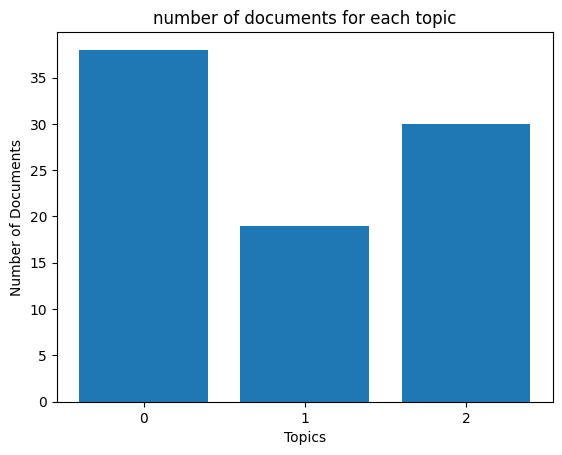

In [86]:
Topic_nums = df_dropna['dominant topic'].value_counts()

plt.bar(Topic_nums.index, Topic_nums.values)
plt.xlabel('Topics')
plt.xticks(Topic_nums.index)
plt.ylabel('Number of Documents')
plt.title('number of documents for each topic')
plt.show()

# 분석 결과 해석
IMDB에서 '너의 이름은(Your Name)' 영화의 리뷰에 대한 분석을 진행했다.

먼저, 개별 리뷰들에 대한 감정분석_vader을 해본 결과, 87개의 긍정 감정 리뷰들과 6개의 부정 감정 리뷰들로 분류되었다.

87개의 긍정 리뷰들을 topic별로 modeling한 결과, 영화 시청 소감을 풍부한 형용사(heartwarming, beautiful, fantastic, really, great 등)와 최고급 표현(best, ever 등)으로 표현했음을 알 수 있었다. 평소 애니메이션 장르나 미야자키 하야오 감독의 작품 스타일을 좋아하는 다수의 사람들로부터 좋은 평을 받은 것이다.

6개의 부정 리뷰들을 읽어본 결과, 사실 그 댓글들이 영화에 대한 부정적인 평을 남긴 것이 아니라, 미국 버전으로 실사판 영화를 리메이크하는 것에 대한 반대 입장이었음을 알 수 있었다. 6개 중 4개의 리뷰에서 'boycott'이라는 단어가 반복되는 것을 clustering에서도 확인할 수 있었다. 영화에 대한 과도한 호감을 지닌 리뷰도 감정분석 기법의 한계로 인해 부정 감정 리뷰로 분류되었다.

이를 바탕으로 비즈니스 인사이트를 도출해보면, 미야자키 하야오 감독의 애니메이션 스타일을 선호하는 사람들이 많기 때문에, 추후 이 감독의 다른 애니메이션이 개봉할 경우, 광고할 때 감독이 미야자키라는 점을 내세운다면, 충성고객들을 끌어들이는 데 도움이 될 것이다. 또한 실사 영화에 대한 반대가 많으므로, 그들이 반대하는 이유에 대해 심층적으로 분석한 후, 리메이크될 영화에서 이러한 점을 반영한다면 더욱 흥행을 할 수 있을 것이라 생각된다.